# **RSNA Breast Cancer Detection**
# ***Data exploration and pre-processing***
BETHUEL Elouan - GHRAIZI Marwa - SALAUN Nicolas

# **Read from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.cbook import flatten

# **Data exploration**

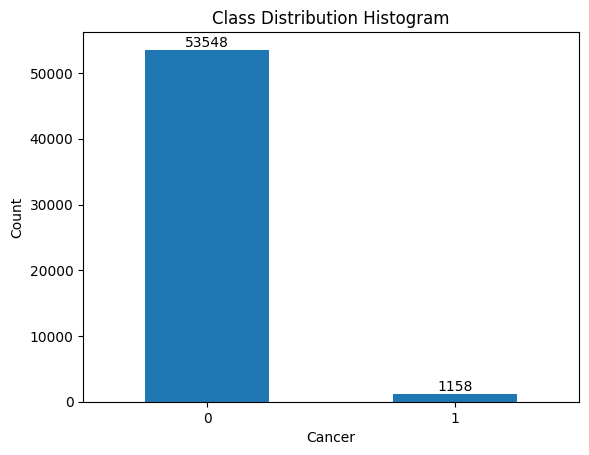

In [ ]:
# Bar plot (histogram) of class distribution

train_metadata = pd.read_csv("/content/drive/MyDrive/AIAO/train.csv")
train_metadata
class_counts = train_metadata['cancer'].value_counts()

bar_plot = class_counts.plot(kind='bar')
plt.xlabel('Cancer')
plt.ylabel('Count')
plt.title('Class Distribution Histogram')
for i, v in enumerate(class_counts):
  bar_plot.text(i, v, str(v), ha='center', va='bottom')
bar_plot.set_xticklabels(class_counts.index,rotation=0)
plt.show()

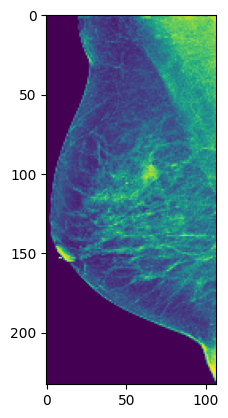

In [ ]:
my_image = mpimg.imread("/content/drive/MyDrive/AIAO/model_ready_data_256_unprocessed/train/1_cancerous/10668_1774497291.png")
plt.imshow(my_image)

In [ ]:
#image exposure comparison

dark_image = cv2.imread("/content/drive/MyDrive/AIAO/model_ready_data_256_unprocessed/train/1_cancerous/10130_1360338805.png")
bright_image = cv2.imread("/content/drive/MyDrive/AIAO/model_ready_data_256_unprocessed/train/1_cancerous/54671_1214090918.png")


Text(0.5, 1.0, 'cancerous image n° 54671_1214090918, bad exposure')

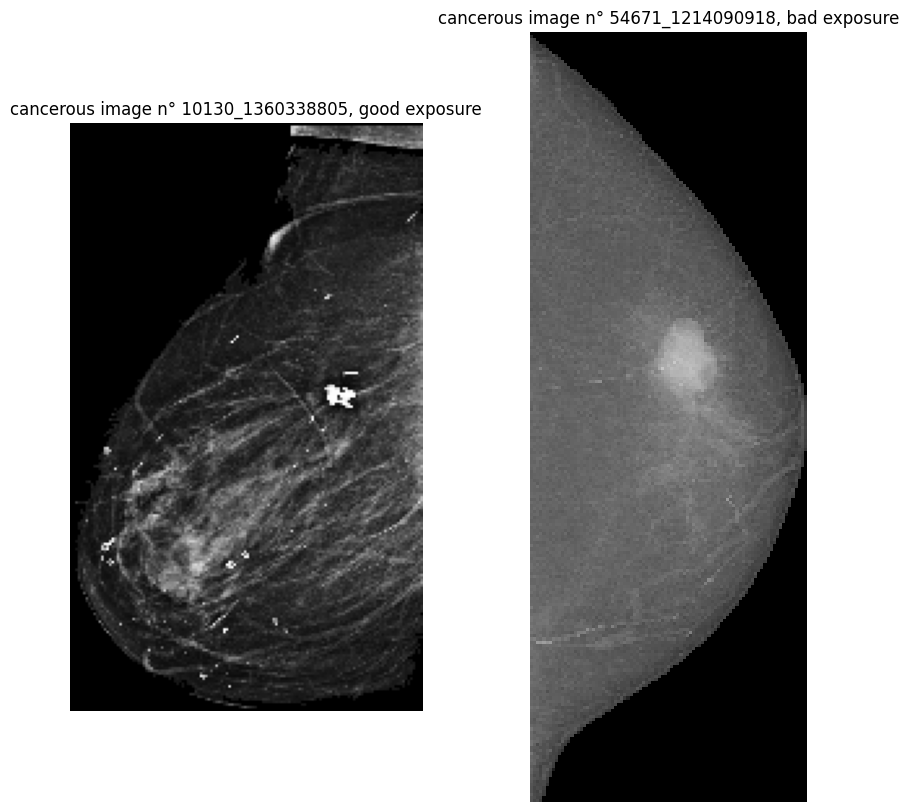

In [ ]:

fig = plt.figure(figsize=(10,10))

fig.add_subplot(1, 2, 1)
plt.imshow(dark_image, aspect='equal')
plt.axis('off')
plt.title("cancerous image n° 10130_1360338805, good exposure")

fig.add_subplot(1, 2, 2)
plt.imshow(bright_image, aspect='equal')
plt.axis('off')
plt.title("cancerous image n° 54671_1214090918, bad exposure")


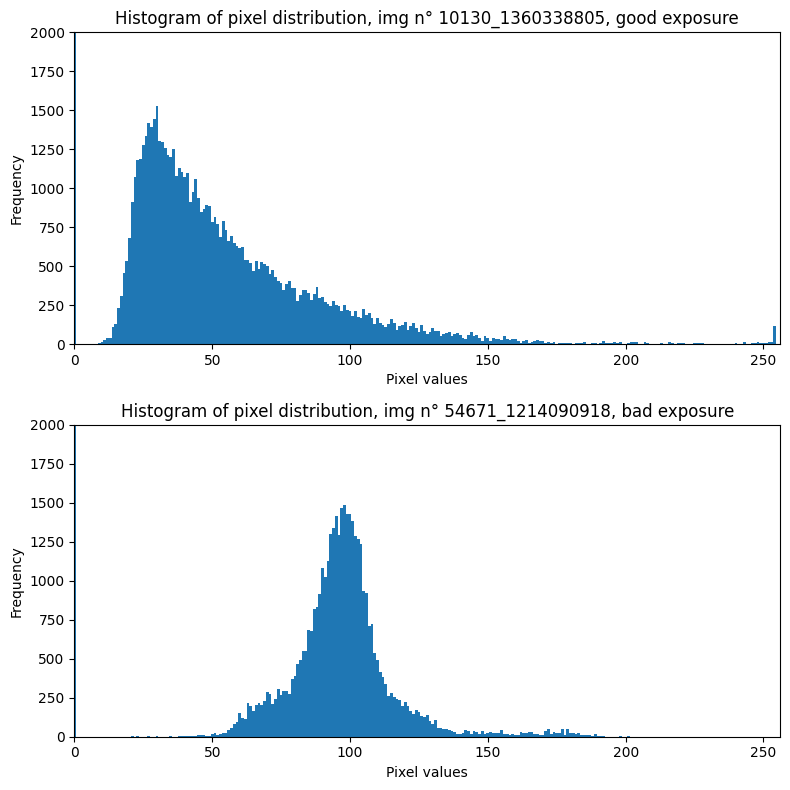

In [ ]:

# good exposure image
# Creat histogram of pixels repartition
histogram_d = np.histogram(dark_image.ravel(), bins=256, range=(0, 256))

# Get histogram values
hist_values_d = histogram_d[0]
bin_edges_d = histogram_d[1]

# Create a new figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Plot histogram
axes[0].set_title("Histogram of pixel distribution, img n° 10130_1360338805, good exposure")
axes[0].set_xlabel("Pixel values")
axes[0].set_ylabel("Frequency")
axes[0].bar(bin_edges_d[:-1], hist_values_d, width=1)
axes[0].set_xlim(min(bin_edges_d), max(bin_edges_d))
axes[0].set_ylim(0, 2000)

# bad exposur image
# Creat histogram of pixels repartition
histogram = np.histogram(bright_image.ravel(), bins=256, range=(0, 256))

# Get histogram values
hist_values = histogram[0]
bin_edges = histogram[1]

axes[1].set_title("Histogram of pixel distribution, img n° 54671_1214090918, bad exposure")
axes[1].set_xlabel("Pixel values")
axes[1].set_ylabel("Frequency")
axes[1].bar(bin_edges[:-1], hist_values, width=1)
axes[1].set_xlim(min(bin_edges), max(bin_edges))
axes[1].set_ylim(0, 2000)


plt.tight_layout()
plt.show()


# **T-SNE**

T-sne with only 400 images of each class

In [ ]:
# path to image directories
data_dir_healthy = "/content/drive/MyDrive/AIAO/model_ready_data_256_unprocessed/train/0_healthy"
data_dir_cancerous = "/content/drive/MyDrive/AIAO/model_ready_data_256_unprocessed/train/1_cancerous"


In [ ]:
# creation of empty pandas dataframe
features_breast_cancer = pd.DataFrame(columns=range(118272))
features_breast_cancer


,0,1,2,3,4,5,6,7,8,9,...,118262,118263,118264,118265,118266,118267,118268,118269,118270,118271


In [ ]:

# Y : class list , cancerous 1, healthy 0
Y = []
i = 0

for filename in os.listdir(data_dir_cancerous):
    if filename.endswith('.png'):

        # load image, flat , and add to dataframe
        image_c = cv2.imread(os.path.join(data_dir_cancerous, filename))
        image_flat_c = image_c.ravel()
        image_series_c = pd.DataFrame(image_flat_c).transpose()
        features_breast_cancer = features_breast_cancer.append(image_series_c, ignore_index=True)
        Y.append(1)
        i = i+1
        if i == 400:
          break

i = 0

for filename in os.listdir(data_dir_healthy):
    if filename.endswith('.png'):

        # load image, flat , and add to dataframe
        image = cv2.imread(os.path.join(data_dir_healthy, filename))
        image_flat = image.ravel()
        image_series = pd.DataFrame(image_flat).transpose()
        features_breast_cancer = features_breast_cancer.append(image_series, ignore_index=True)
        Y.append(0)
        i = i+1
        if i == 400:
          break


<ipython-input-5-fdab7f9ff4cb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_breast_cancer = features_breast_cancer.append(image_series_c, ignore_index=True)
<ipython-input-5-fdab7f9ff4cb>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_breast_cancer = features_breast_cancer.append(image_series, ignore_index=True)


In [ ]:
# removes Na
features_breast_cancer = features_breast_cancer.fillna(0)

In [ ]:
features_breast_cancer

,0,1,2,3,4,5,6,7,8,9,...,196598,196599,196600,196601,196602,196603,196604,196605,196606,196607
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=50)
X = tsne.fit_transform(features_breast_cancer)


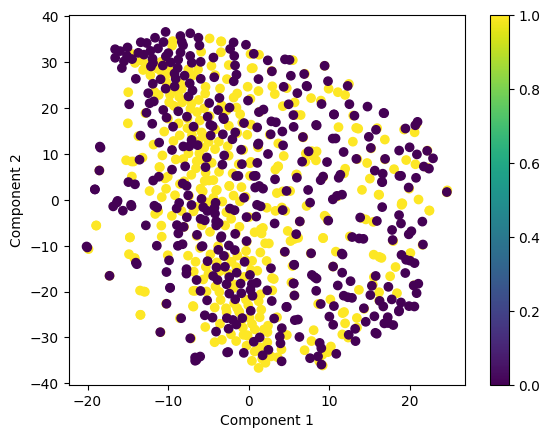

In [ ]:
# Colored scatter diagram according to class 0 or 1
plt.scatter(X[:, 0], X[:, 1], c= Y , cmap='viridis')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.savefig("t-sne_50.png")
plt.show()

# **Normalisation**

In [ ]:

# List for storing mean values, standard deviations and precentiles
mean_values = []
stddev_values = []
list_percentile_inf = []
list_percentile_sup = []

# choice of percentiles
val_perc_inf = 2
val_perc_sup = 98


for filename in os.listdir(data_dir_healthy):
    if filename.endswith('.png'):

        # Charger l'image
        image = cv2.imread(data_dir_healthy + "/" + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.array(image)

        # calculate the mean, standard deviation and percentiles of each image
        mean_value = np.mean(image)
        stddev_value = np.std(image)
        percentile_inf = np.percentile(image, val_perc_inf)
        percentile_sup = np.percentile(image, val_perc_sup)

        # Ajouter les valeurs à la liste
        mean_values.append(mean_value)
        stddev_values.append(stddev_value)
        list_percentile_inf.append(percentile_inf)
        list_percentile_sup.append(percentile_sup)


for filename in os.listdir(data_dir_cancerous):
    if filename.endswith('.png'):

        # load image
        image = cv2.imread(data_dir_cancerous + "/" + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.array(image)

        # calculate the mean, standard deviation and percentiles of each image
        mean_value = np.mean(image)
        stddev_value = np.std(image)
        percentile_inf = np.percentile(image, val_perc_inf)
        percentile_sup = np.percentile(image, val_perc_sup)

        # add to lists
        mean_values.append(mean_value)
        stddev_values.append(stddev_value)
        list_percentile_inf.append(percentile_inf)
        list_percentile_sup.append(percentile_sup)



In [ ]:
# Calculation of global mean, std and percentiles

moyenne_gl = np.mean(mean_values)
std_gl = np.mean(stddev_values)

percentile_inf_gl= np.array(list_percentile_inf)
percentile_sup_gl= np.array(list_percentile_sup)
percentile_inf_gl = np.mean(percentile_inf_gl)
percentile_sup_gl = np.mean(percentile_sup_gl)


In [ ]:
# Show results
print("Mean value of all pixels :", moyenne_gl)
print("Standard deviation of all pixels :", std_gl)
print("Percentile inf:", percentile_inf_gl)
print("Perenctile sup :", percentile_sup_gl)


Mean value of all pixels : 67.39682360363011
Standard deviation of all pixels : 53.76703306273615
Percentile inf: 0.0
Perenctile sup : 173.9418549222798


In [ ]:
# create a folder to store normalized and equalizade images

os.makedirs("train_norm/0_healthy",  exist_ok=True)
os.makedirs("train_norm/1_cancerous",  exist_ok=True)

os.makedirs("train_norm_z/0_healthy",  exist_ok=True)
os.makedirs("train_norm_z/1_cancerous",  exist_ok=True)

os.makedirs("train_norm_equ/0_healthy",  exist_ok=True)
os.makedirs("train_norm_equ/1_cancerous",  exist_ok=True)


In [ ]:

output_directory_healthy = "train_norm/0_healthy"
output_directory_cancerous = "train_norm/1_cancerous"

output_directory_healthy_z = "train_norm_z/0_healthy"
output_directory_cancerous_z = "train_norm_z/1_cancerous"

output_directory_healthy_equ = "train_norm_equ/0_healthy"
output_directory_cancerous_equ = "train_norm_equ/1_cancerous"


for filename in os.listdir(data_dir_healthy):
    if filename.endswith('.png'):

        # load image
        image = cv2.imread(os.path.join(data_dir_healthy, filename))
        image = np.array(image)

        # Normalisation z-score
        image_norm_z = (image - moyenne_gl)  / std_gl
        image_norm_z = image_norm_z*255
         # save image
        destination_path = os.path.join(output_directory_healthy_z, filename)
        cv2.imwrite(destination_path, image_norm_z)

        # normalisation percentile
        image_norm = (image - percentile_inf_gl) / (percentile_sup_gl - percentile_inf_gl)
        image_norm = image*255
        # save image
        destination_path = os.path.join(output_directory_healthy, filename)
        cv2.imwrite(destination_path, image_norm)

        # Egalisation histogram
        image_eq = cv2.imread(os.path.join(data_dir_healthy, filename), cv2.IMREAD_GRAYSCALE)
        image_eq = cv2.equalizeHist(image_eq)
        # save image
        destination_path = os.path.join(output_directory_healthy_equ, filename)
        cv2.imwrite(destination_path, image_eq)


for filename in os.listdir(data_dir_cancerous):
    if filename.endswith('.png'):

        # Charger l'image
        image = cv2.imread(os.path.join(data_dir_cancerous, filename))
        image = np.array(image)

        # Normalisation z-score
        image_norm_z = (image - moyenne_gl)  / std_gl
        image_norm_z = image_norm_z*255
        # save image
        destination_path = os.path.join(output_directory_cancerous_z, filename)
        cv2.imwrite(destination_path, image_norm_z)

        # normalisation percentile
        image_norm = (image - percentile_inf_gl) / (percentile_sup_gl - percentile_inf_gl)
        image_norm = image_norm*255
        # save image
        destination_path = os.path.join(output_directory_cancerous, filename)
        cv2.imwrite(destination_path, image_norm)

        # Egalisation histogramme
        image_eq = cv2.imread(os.path.join(data_dir_cancerous, filename), cv2.IMREAD_GRAYSCALE)
        image_eq = cv2.equalizeHist(image_eq)
        # save image
        destination_path = os.path.join(output_directory_cancerous_equ, filename)
        cv2.imwrite(destination_path, image_eq)


In [ ]:
!cp -r train_norm_equ /content/drive/MyDrive/

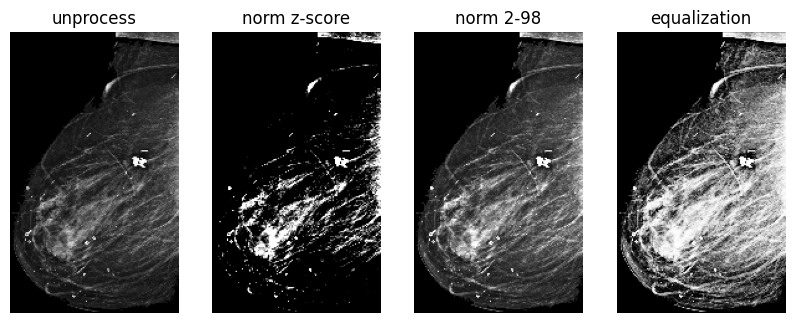

In [ ]:

# shows the effect of each treatment

image = cv2.imread("/content/drive/MyDrive/AIAO/model_ready_data_256_unprocessed/train/1_cancerous/10130_1360338805.png")
image_norm_z = cv2.imread("/content/train_norm_z/1_cancerous/10130_1360338805.png")
image_norm_perct = cv2.imread("/content/train_norm/1_cancerous/10130_1360338805.png")
image_norm_equ = cv2.imread("/content/train_norm_equ/1_cancerous/10130_1360338805.png")

fig = plt.figure(figsize=(10,25))

fig.add_subplot(1, 4, 1)
plt.imshow(image)
plt.axis('off')
plt.title("unprocess")

fig.add_subplot(1, 4, 2)
plt.imshow(image_norm_z)
plt.axis('off')
plt.title("norm z-score")

fig.add_subplot(1, 4, 3)
plt.imshow(image_norm_perct)
plt.axis('off')
plt.title("norm 2-98")

fig.add_subplot(1, 4, 4)
plt.imshow(image_norm_equ)
plt.axis('off')
plt.title("equalization")

plt.savefig("image_comparison_normalisation_10130_1360338805.png")


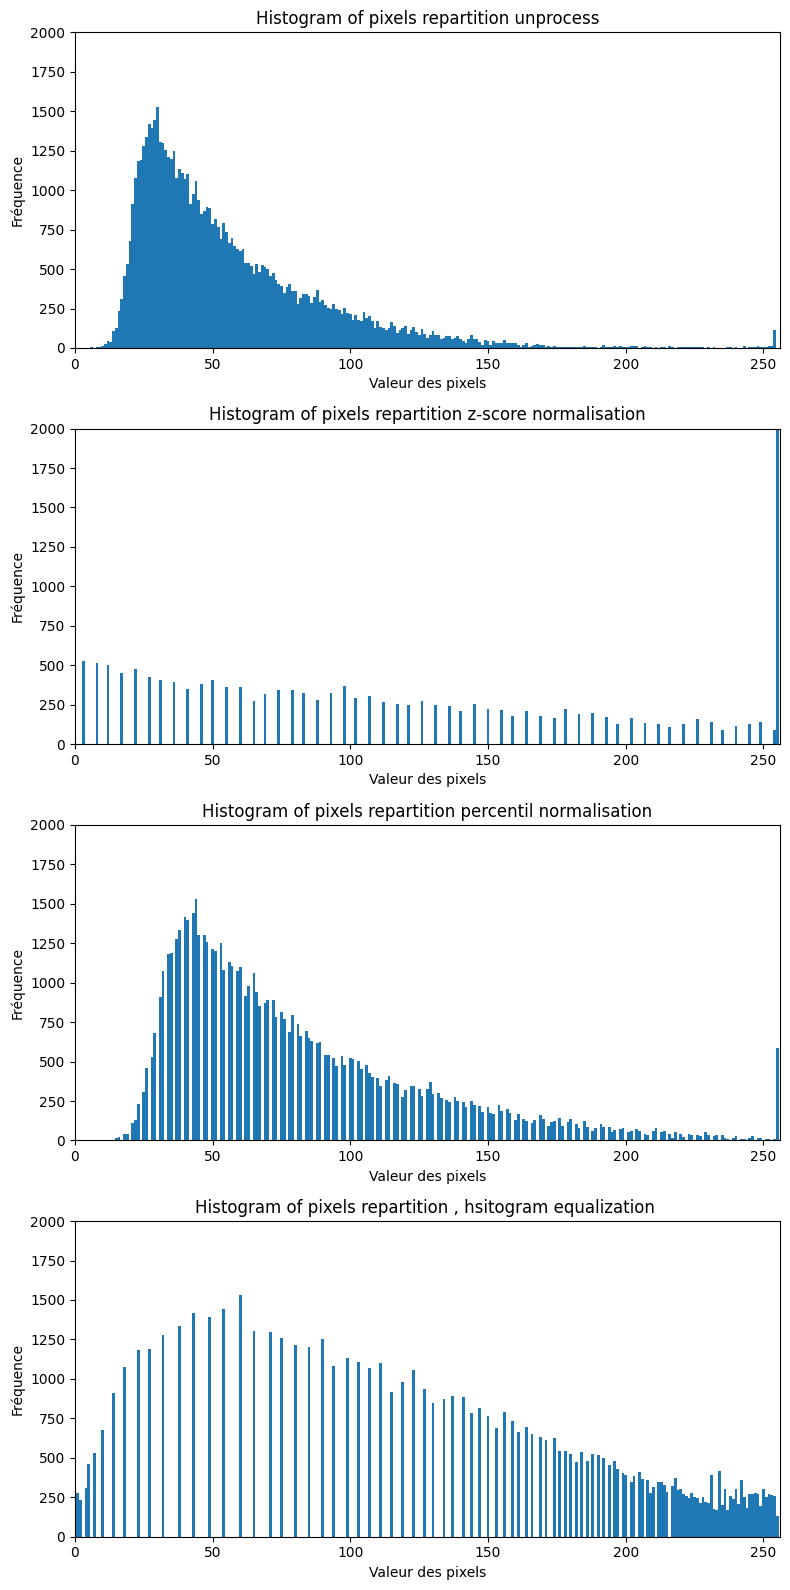

In [ ]:

# Histogram of pixels repartition for each treatment

fig, axes = plt.subplots(4, 1, figsize=(8, 16))

# List of images
images = [image, image_norm_z, image_norm_perct, image_norm_equ]
titles = [
    "Histogram of pixels repartition unprocess",
    "Histogram of pixels repartition z-score normalisation",
    "Histogram of pixels repartition percentil normalisation",
    "Histogram of pixels repartition , hsitogram equalization "]

for i, img in enumerate(images):
    histogram = np.histogram(img.ravel(), bins=256, range=(0, 256))

    hist_values = histogram[0]
    bin_edges = histogram[1]

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Valeur des pixels")
    axes[i].set_ylabel("Fréquence")
    axes[i].bar(bin_edges[:-1], hist_values, width=1)
    axes[i].set_xlim(min(bin_edges), max(bin_edges))
    axes[i].set_ylim(0, 2000)

plt.tight_layout()
plt.savefig("histogram_comparison_normalisation_10130_1360338805.png")
plt.show()


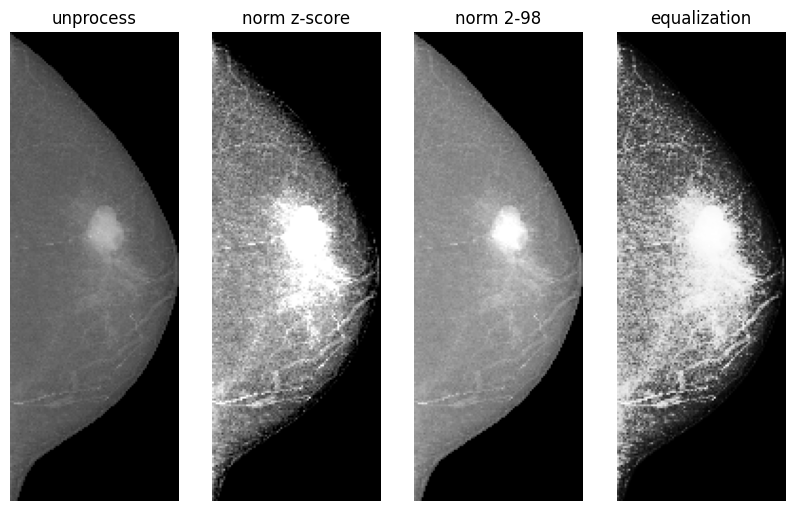

In [ ]:

image = cv2.imread("/content/drive/MyDrive/AIAO/model_ready_data_256_unprocessed/train/1_cancerous/54671_1214090918.png")
image_norm_z = cv2.imread("/content/train_norm_z/1_cancerous/54671_1214090918.png")
image_norm_perct = cv2.imread("/content/train_norm/1_cancerous/54671_1214090918.png")
image_norm_equ = cv2.imread("/content/train_norm_equ/1_cancerous/54671_1214090918.png")

fig = plt.figure(figsize=(10,25))

fig.add_subplot(1, 4, 1)
plt.imshow(image)
plt.axis('off')
plt.title("unprocess")

fig.add_subplot(1, 4, 2)
plt.imshow(image_norm_z)
plt.axis('off')
plt.title("norm z-score")

fig.add_subplot(1, 4, 3)
plt.imshow(image_norm_perct)
plt.axis('off')
plt.title("norm 2-98")

fig.add_subplot(1, 4, 4)
plt.imshow(image_norm_equ)
plt.axis('off')
plt.title("equalization")

plt.savefig("image_comparison_normalisation_54671_1214090918.png")


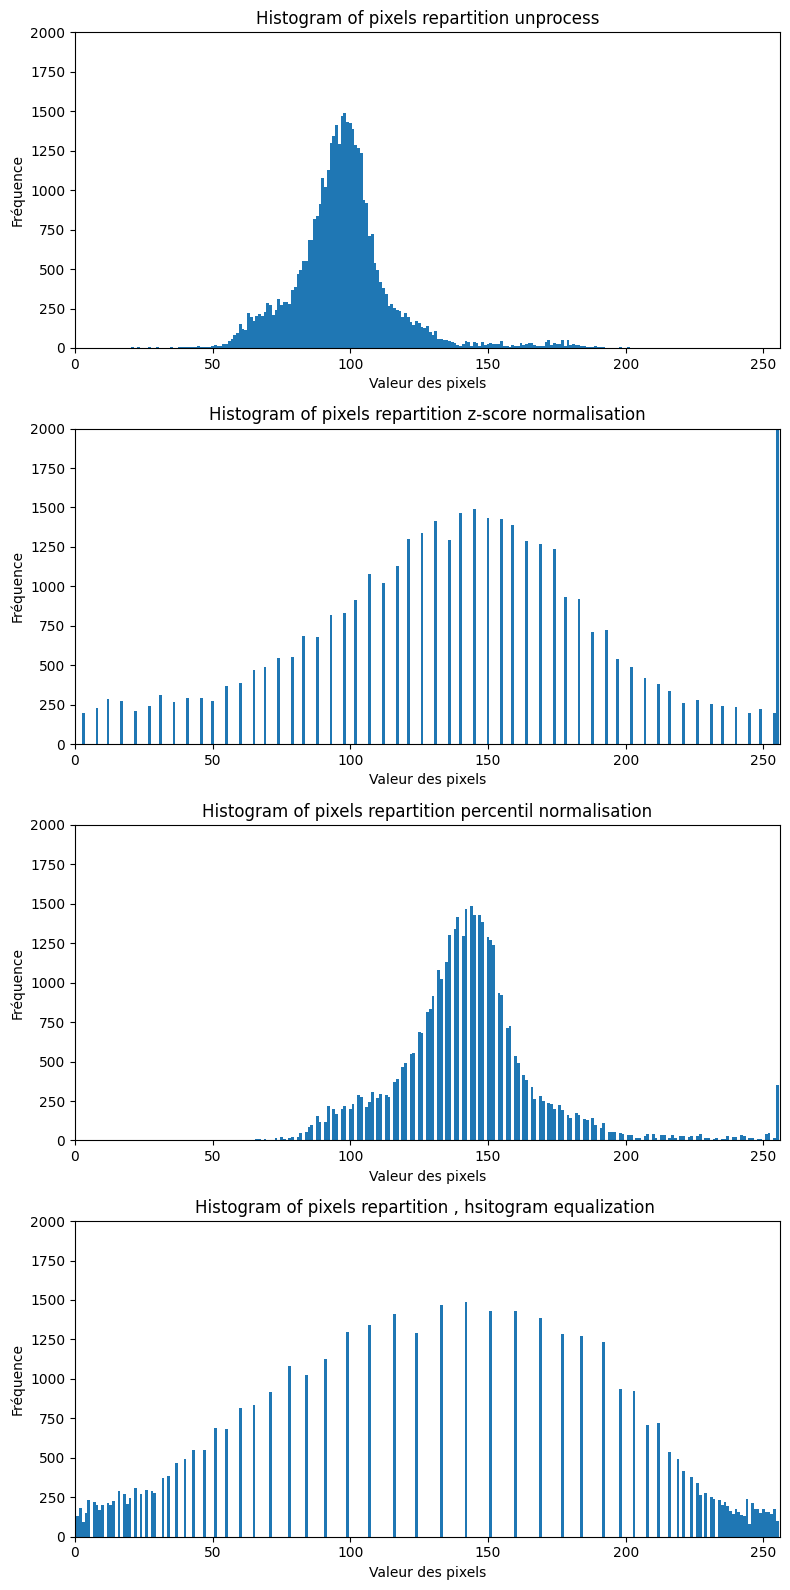

In [ ]:
# Histogram of pixels repartition for each treatment

fig, axes = plt.subplots(4, 1, figsize=(8, 16))

# List of images
images = [image, image_norm_z, image_norm_perct, image_norm_equ]
titles = [
    "Histogram of pixels repartition unprocess",
    "Histogram of pixels repartition z-score normalisation",
    "Histogram of pixels repartition percentil normalisation",
    "Histogram of pixels repartition , hsitogram equalization "]

for i, img in enumerate(images):
    histogram = np.histogram(img.ravel(), bins=256, range=(0, 256))

    hist_values = histogram[0]
    bin_edges = histogram[1]

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Valeur des pixels")
    axes[i].set_ylabel("Fréquence")
    axes[i].bar(bin_edges[:-1], hist_values, width=1)
    axes[i].set_xlim(min(bin_edges), max(bin_edges))
    axes[i].set_ylim(0, 2000)

plt.tight_layout()
plt.savefig("histogram_comparison_normalisation_54671_1214090918.png")
plt.show()